In [1]:
import sys
sys.path.append('../')
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from smodels.theory.element import Element
from smodels.particlesLoader import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.theory.model import Model
from smodels.theory.tree import ParticleNode,Tree
import itertools


In [2]:
slhafile = '../inputFiles/slha/lightEWinos.slha'
model = Model(BSMparticles=BSMList, SMparticles=SMList)
model.updateParticles(inputFile=slhafile, erasePrompt=['spin'])

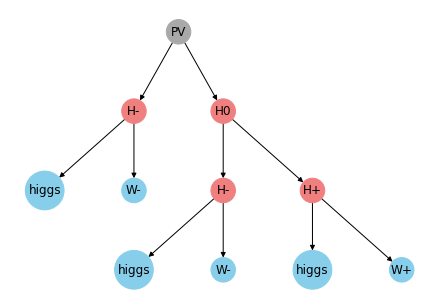

In [3]:
stringEla = "(PV > H0(1),H-(2)), (H0(1) > H+(3),H-(4)), (H+(3) > W+,higgs), (H-(4) > W-,higgs), (H-(2) > W-,higgs)"
ela = Element(info=stringEla,model=model)
ela.drawTree(nodeScale=3)

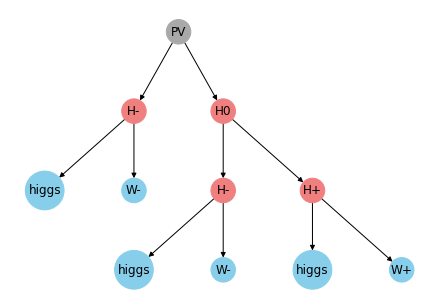

In [4]:
stringElb = "(PV > H0(1),H-(2)), (H-(2) > W-,higgs), (H0(1) > H-(3),H+(4)), (H-(3) > higgs,W-), (H+(4) > W+,higgs)"
elb = Element(info=stringElb,model=model)
elb.drawTree(nodeScale=3)

In [5]:
ela == elb

True

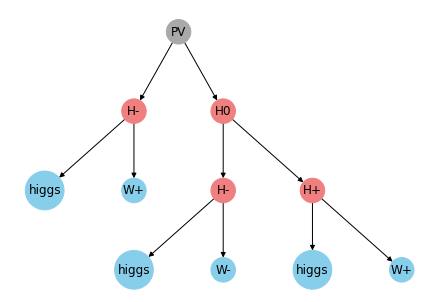

In [6]:
stringElc = "(PV > H0(1),H-(2)), (H-(2) > W+,higgs), (H0(1) > H-(3),H+(4)), (H-(3) > higgs,W-), (H+(4) > W+,higgs)"
elc = Element(info=stringElc,model=model)
elc.drawTree(nodeScale=3)

In [7]:
elc == ela

False

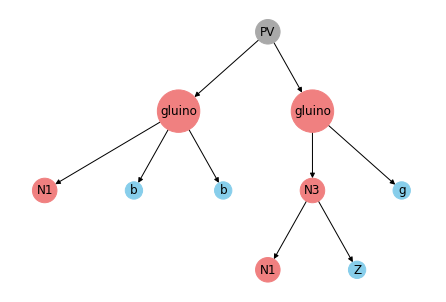

In [8]:
stringEl = "(PV > gluino(1),gluino(2)), (gluino(1) > N1,b,b), (gluino(2) > g,N3(3)), (N3(3) > N1,Z)"
elA = Element(info=stringEl,model=model)
elA.drawTree(nodeScale=3)

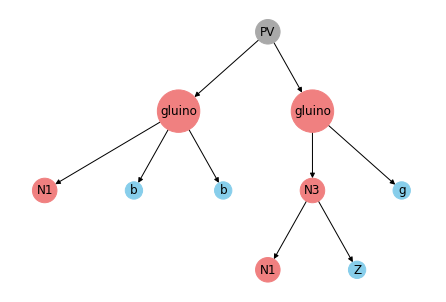

In [9]:
stringEl = "(PV > gluino(1),gluino(2)), (gluino(1) > g,N3(3)), (gluino(2) > N1,b,b), (N3(3) > N1,Z)"
elB = Element(info=stringEl,model=model)
elB.drawTree(nodeScale=3)

In [10]:
elA == elB

True